# Pre-Processing and Training Data Development


Purpose:
    Now that I’ve obtained, cleaned, and wrangled my dataset into a form that's ready
for analysis, it’s time to perform exploratory data analysis (EDA). I will Keep in mind that the goal of the EDA work is to
get familiar with the features in your dataset, investigate the relationships between
features, and generally understand the core characteristics of my dataset. Be creative
and think about interesting figures and plots you can create to help deepen my
understanding of the data.

Goal: Create a cleaned development dataset you can use to complete the
modeling step of your project. 

With this project I Created a dummy indicator features for categorical variables 

Steps I will be taking in the process I will be:
- Creating dummy or indicator features for categorical variables
- Standardizing the magnitude of numeric features using a scaler
 
 I will be answering the questions 'Does my data set have any categorical data, such as Gender or day of the week?
Do my features have data values that range from 0 - 100 or 0-1 or both and more?'

Importing the modules I will be using

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy
import pandas.util.testing as tm

Importing the dataset

In [57]:

df = pd.read_excel(r"EDA_DATA.xlsx")
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,Unnamed: 0,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,0,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,1,2016-10-14,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,2,2017-03-07,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703
3,3,2016-03-19,goSporto,Consumer Internet,Online Sports discovery and booking platform,Delhi,Naveen Gupta,Seed Funding,30000,12,117.703
4,4,2016-02-04,Perfumery,ECommerce,Fragrances & Perfume eTailer,Delhi,Oranda Global & Others,Seed Funding,30000,12,117.703
...,...,...,...,...,...,...,...,...,...,...,...
490,490,2016-11-04,Browntape,Technology,cloud-based software solutions company,Goa,Gati Ltd,Private Equity,0,23,11.115
491,491,2015-05-12,Mobiefit,Mobile Fitness App,Mobile Fitness App,Goa,Prototyze,Seed Funding,0,23,11.115
492,492,2019-06-10,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,15500000,13,111.519
493,493,2019-06-08,Vogo Automotive Pvt. Ltd.,Transportation,Dockless Scooter Rental Company,Karnataka,Alteria Capital,Debt Funding,3584000,5,226.806


In [58]:
nrow, ncol = df.shape
nrow, ncol

(495, 11)

In [59]:
df.head(3)

,Unnamed: 0,Date,Startup Name,Industry,Sub-Vertical,State,Investors’ Name,Investment Type,Amount (In USD),Rank,GDP
0,0,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,Delhi,The Ten Minute Million,Seed Funding,22500,12,117.703
1,1,2016-10-14,Newspatrolling,Consumer Internet,Online News portal,Delhi,Undisclosed,Seed Funding,25000,12,117.703
2,2,2017-03-07,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,Delhi,National Science and Technology Entrepreneursh...,Seed Funding,30000,12,117.703


In [60]:
sns.set_style(style = 'whitegrid')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       495 non-null    int64         
 1   Date             495 non-null    datetime64[ns]
 2   Startup Name     495 non-null    object        
 3   Industry         495 non-null    object        
 4   Sub-Vertical     495 non-null    object        
 5   State            495 non-null    object        
 6   Investors’ Name  491 non-null    object        
 7   Investment Type  495 non-null    object        
 8   Amount (In USD)  495 non-null    int64         
 9   Rank             495 non-null    int64         
 10  GDP              495 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 42.7+ KB


Now making sure I have the variables all sorted that I will be using in this project - GDP and Amount in USD. I will be removing the other variables for now

In [62]:
df['Amount (In USD)'].isnull().values.any()

False

In [63]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('', 0)

In [64]:
df['Amount (In USD)'] = df['Amount (In USD)'].replace('undisclosed', 0)

In [65]:
df['Amount (In USD)'] = df['Amount (In USD)'].fillna(0)

In [66]:
df['Amount (In USD)']

0         22500
1         25000
2         30000
3         30000
4         30000
         ...   
490           0
491           0
492    15500000
493     3584000
494           0
Name: Amount (In USD), Length: 495, dtype: int64

In [67]:
df['Amount (In USD)']  = df['Amount (In USD)'].astype('int')

In [68]:
df.to_excel(r"EDA_DATA.xlsx")

In [69]:
del df['Startup Name']

In [70]:
del df['Industry']

In [71]:
del df['Sub-Vertical']

In [72]:
del df['Investment Type']

In [73]:
del df['Rank']

In [74]:
del df['Date']

In [75]:
del df['State']

In [76]:
del df['Investors’ Name']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       495 non-null    int64  
 1   Amount (In USD)  495 non-null    int32  
 2   GDP              495 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 9.8 KB


Split the dataset into Independent(X) and Dependent(y) Variables

In [78]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

In [79]:
print(x[10])

[10]


In [80]:
print(y[10])

117.703


Divide the complete dataset into training and testing data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Implement Classifier based on Simple Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
predictions = model.predict(X_test)
predictions

array([121.10017941, 112.59824081, 111.09484923, 102.85211607,
       108.34727151, 124.98826109, 109.38409329, 100.67479033,
       117.52314427, 117.8341908 , 113.27217496, 112.80560516,
       105.70337597, 110.78380269, 116.9010512 , 108.81384131,
       101.7634532 , 107.46597299, 117.78234971, 123.84775713,
       115.13845417, 106.89572101, 113.32401605, 120.16703981,
       123.43302842, 103.21500369, 124.67721455, 106.84387992,
       120.78913287, 113.68690368, 105.80705814, 119.64862892,
       119.33758238, 115.86422942, 106.53283339, 107.25860864,
       109.64329873, 102.64475171, 107.56965517, 113.42769823,
       109.07304675, 123.38118733, 105.02944181, 114.30899675,
       121.82595466, 125.71403633, 114.72372546, 104.87391854,
       104.25182547, 120.47808634, 107.05124428, 116.95289229,
       103.47420914, 118.3007606 , 118.92285367, 125.14378435,
       108.8656824 , 116.79736902, 114.15347348, 108.13990715,
       121.72227248, 111.45773685, 104.45918983, 103.88

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

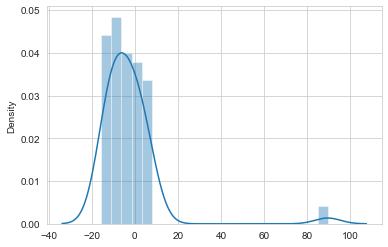

In [84]:
sns.distplot(predictions-y_test)

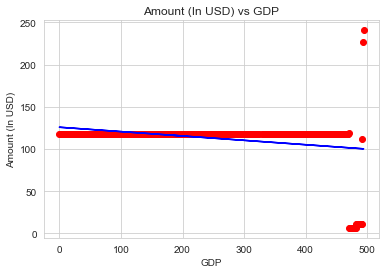

In [85]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Amount (In USD) vs GDP')
plt.xlabel('GDP')
plt.ylabel('Amount (In USD)')
plt.show()

Standardize the magnitude of numeric features using a scaler


In [86]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [87]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [88]:
predictionss = models.predict(Xs)
predictionss

array([ 0.30157357, -0.00298253, -0.05683697, -0.35210782, -0.15526059,
        0.44085228, -0.1181196 , -0.4301039 ,  0.17343716,  0.18457946,
        0.02115911,  0.00444566, -0.24997011, -0.06797926,  0.15115257,
       -0.13854714, -0.39110586, -0.18683043,  0.18272241,  0.39999719,
        0.08801289, -0.20725797,  0.02301616,  0.26814668,  0.38514079,
       -0.33910848,  0.42970998, -0.20911502,  0.29043127,  0.0360155 ,
       -0.24625601,  0.24957619,  0.23843389,  0.11401158, -0.22025732,
       -0.19425862, -0.10883435, -0.35953602, -0.18311633,  0.02673026,
       -0.12926189,  0.38328375, -0.27411175,  0.0583001 ,  0.32757226,
        0.46685097,  0.07315649, -0.2796829 , -0.30196749,  0.27928898,
       -0.20168682,  0.15300962, -0.32982323,  0.2012929 ,  0.2235775 ,
        0.44642343, -0.13669009,  0.14743847,  0.05272895, -0.16268878,
        0.32385816, -0.04383762, -0.29453929, -0.31496684, -0.09026386,
        0.10472633,  0.45013752, -0.2759688 , -0.03455237,  0.32

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

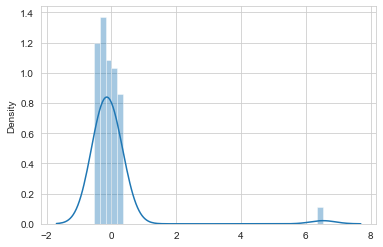

In [89]:
sns.distplot(predictionss-Ys)

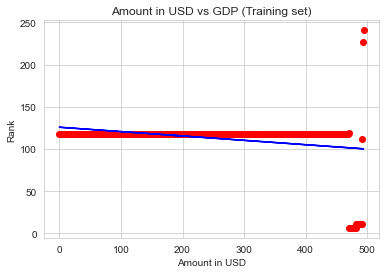

In [90]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Amount in USD vs GDP (Training set)')
plt.xlabel('Amount in USD')
plt.ylabel('Rank')
plt.show()

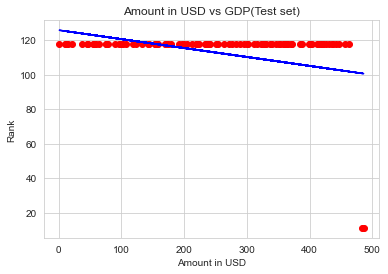

In [91]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Amount in USD vs GDP(Test set)')
plt.xlabel('Amount in USD')
plt.ylabel('Rank')
plt.show()

Standardize the magnitude of numeric features using a scaler

In [92]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [93]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [94]:
predictionss = models.predict(Xs)
predictionss

array([ 0.30157357, -0.00298253, -0.05683697, -0.35210782, -0.15526059,
        0.44085228, -0.1181196 , -0.4301039 ,  0.17343716,  0.18457946,
        0.02115911,  0.00444566, -0.24997011, -0.06797926,  0.15115257,
       -0.13854714, -0.39110586, -0.18683043,  0.18272241,  0.39999719,
        0.08801289, -0.20725797,  0.02301616,  0.26814668,  0.38514079,
       -0.33910848,  0.42970998, -0.20911502,  0.29043127,  0.0360155 ,
       -0.24625601,  0.24957619,  0.23843389,  0.11401158, -0.22025732,
       -0.19425862, -0.10883435, -0.35953602, -0.18311633,  0.02673026,
       -0.12926189,  0.38328375, -0.27411175,  0.0583001 ,  0.32757226,
        0.46685097,  0.07315649, -0.2796829 , -0.30196749,  0.27928898,
       -0.20168682,  0.15300962, -0.32982323,  0.2012929 ,  0.2235775 ,
        0.44642343, -0.13669009,  0.14743847,  0.05272895, -0.16268878,
        0.32385816, -0.04383762, -0.29453929, -0.31496684, -0.09026386,
        0.10472633,  0.45013752, -0.2759688 , -0.03455237,  0.32

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

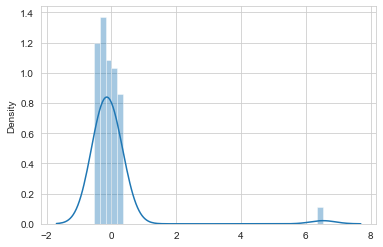

In [95]:
sns.distplot(predictionss-Ys)

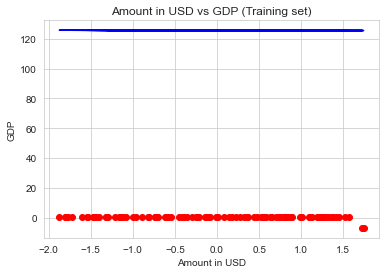

In [96]:
plt.scatter(Xs, Ys, color = 'red')
plt.plot(Xs, model.predict(Xs), color = 'blue')
plt.title('Amount in USD vs GDP (Training set)')
plt.xlabel('Amount in USD')
plt.ylabel('GDP')
plt.show()

Convert categorical data into dummy or indicator variables

In [97]:
state_dummies = pd.get_dummies(df, prefix='State', drop_first=True) 
df = pd.concat([df, state_dummies], axis = 1)
df.head()

,Unnamed: 0,Amount (In USD),GDP,Unnamed: 0,Amount (In USD),GDP
0,0,22500,117.703,0,22500,117.703
1,1,25000,117.703,1,25000,117.703
2,2,30000,117.703,2,30000,117.703
3,3,30000,117.703,3,30000,117.703
4,4,30000,117.703,4,30000,117.703


In [98]:
Industry_dummies = pd.get_dummies(df, prefix='Industry') 
df = pd.concat([df, Industry_dummies], axis = 1)
df.head()

,Unnamed: 0,Amount (In USD),GDP,Unnamed: 0,Amount (In USD),GDP,Unnamed: 0,Amount (In USD),GDP,Unnamed: 0,Amount (In USD),GDP
0,0,22500,117.703,0,22500,117.703,0,22500,117.703,0,22500,117.703
1,1,25000,117.703,1,25000,117.703,1,25000,117.703,1,25000,117.703
2,2,30000,117.703,2,30000,117.703,2,30000,117.703,2,30000,117.703
3,3,30000,117.703,3,30000,117.703,3,30000,117.703,3,30000,117.703
4,4,30000,117.703,4,30000,117.703,4,30000,117.703,4,30000,117.703


In [99]:
df.to_excel("Amount (In USD)_dummies.xlsx")

In [100]:
data = df[["Amount (In USD)", 'GDP']]

In [101]:
# split into inputs and outputs
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [102]:
print(X.shape, y.shape)

(495, 7) (495,)


In [103]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 7) (164, 7) (331,) (164,)


In [104]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 7) (164, 7) (331,) (164,)


In [105]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [106]:
# make predictions
yhat = model.predict(X_test)

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

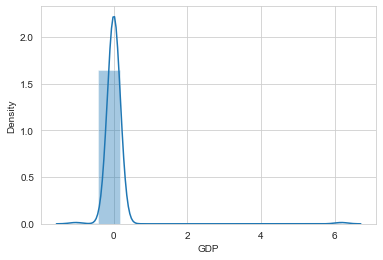

In [107]:
sns.distplot(yhat-y_test)


C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

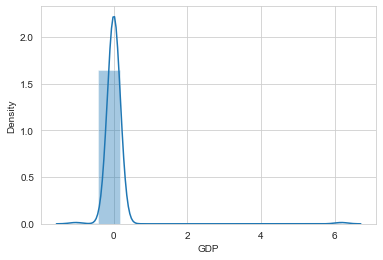

In [108]:
sns.distplot(yhat-y_test)

'Does my data set have any categorical data, such as Gender or day of the week?
 Do my features have data values that range from 0 - 100 or 0-1 or both and more?'
 
 Yes, my data does have categorical data - I have used Amount in USD, which is, the amount each start up has raised. And, my data has GDP, which is, the GDP of each Indian State.
 
 My data has values that both range from 1-28 (Number of Indian States) as well as, numbers that range from 0 - well over 100,000 (Amount in USD).
 
 